**What is Exploratory Data Analysis?**

Exploratory Data Analysis is investigating data and drawing out insights from it to study its main characteristics. EDA can be done using statistical and visualization techniques.


**Why is EDA important?**

We simply can’t make sense of such huge datasets if we don’t explore the data.

Exploring and analyzing the data is important to see how features are contributing to the target variable, identifying anomalies and outliers to treat them lest they affect our model, to study the nature of the features, and be able to perform data cleaning so that our model building process is as efficient as possible.

If we don’t perform exploratory data analysis, we won’t be able to find inconsistent or incomplete data that may pose trends incorrectly to our model.

In [49]:
import pandas as pd       #data processing
import numpy as np        #linear algebra

#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [50]:
data=pd.read_csv("/content/sample_data/nyc_taxi_trip_duration.csv")

In [51]:
data.shape

(729322, 11)

In [52]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [53]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.

vendor_id, passenger_count, and trip_duration are of type int.

pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float

In [54]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


**Independent Variables:**

id — a unique identifier for each trip

vendor_id — a code indicating the provider associated with the trip record

pickup_datetime — date and time when the meter was engaged

dropoff_datetime — date and time when the meter was disengaged

passenger_count — the number of passengers in the vehicle (driver entered value)

pickup_longitude — the longitude where the meter was engaged

pickup_latitude — the latitude where the meter was engaged

dropoff_longitude — the longitude where the meter was disengaged

dropoff_latitude — the latitude where the meter was disengaged

store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.





**Target Variable:**

trip_duration — duration of the trip in seconds

In [55]:
#Let us see if there are any null values in our dataset.

data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [56]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

We see that id has 729322 unique values which are equal to the number of rows in our dataset.

There are 2 unique vendor ids.

There are 9 unique passenger counts.

There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

In [57]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Some insights from the above summary:

Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.

Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.



Feature Creation

Let us create some new features from the existing variables so that we can gain more insights from the data.

Remember pickup_datetime and dropoff_datetime were both of type object.
If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.

We can convert it to datetime using the following code.

In [58]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])

data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [59]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Now, let us extract and create new features from this datetime features we just created.

In [60]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()

data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [61]:
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday


data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour


data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.

pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.

pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.

pickup_month and dropoff_month with month number with January=1 and December=12.

Next, we have defined a function that lets us determine what time of the day the ride was taken. 

We have created 4 time zones 

‘Morning’ (from 6:00 am to 11:59 am), 

‘Afternoon’ (from 12 noon to 3:59 pm),

‘Evening’ (from 4:00 pm to 9:59 pm), and 

‘Late Night’ (from 10:00 pm to 5:59 am)

In [62]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

Now let us apply this function and create new columns in the dataset.

In [63]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)

data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [64]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

In [65]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16,2,2,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4,23,23,3,3,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning


We also saw during dataset exploration that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that.
So, the most obvious feature that we can extract from this is distance. Let us do that.

Importing the library which lets us calculate distance from geographical coordinates.



In [66]:
from geopy.distance import great_circle

Defining a function to take coordinates as inputs and return us distance.


In [67]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

Finally, applying the function to our dataset and creating the feature ‘distance’.

In [94]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [95]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


Thus, we successfully created some new features which we will analyze in univariate and bivariate analysis.

**Univariate Analysis**

The univariate analysis involves studying patterns of all variables individually.

**Target Variable**

Let us start by analyzing the target variable.

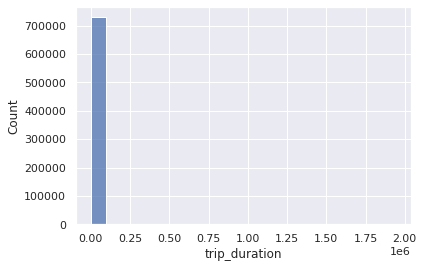

In [70]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

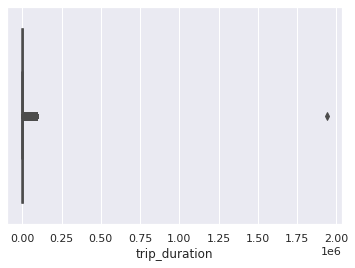

In [71]:
#The histogram is really skewed as we can see.

#Let us also look at the boxplot.

sns.boxplot(data['trip_duration'])

We can clearly see an outlier.


In [72]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

We can see that there is an entry which is significantly different from others.

As there is a single row only, let us drop this row.

In [73]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

In [74]:
data['trip_duration'].sort_values(ascending=False)

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
          ...  
398887        1
95823         1
323299        1
533760        1
102646        1
Name: trip_duration, Length: 729321, dtype: int64

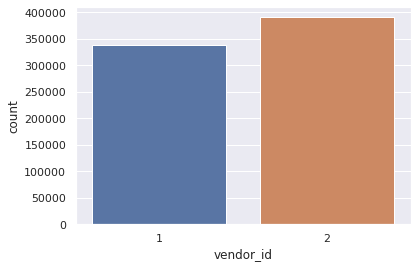

In [75]:
#Vendor id
sns.countplot(x='vendor_id',data=data)

We see that there is not much difference between the trips taken by both vendors.

In [76]:
#Passenger Count
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

There are some trips with even 0 passenger count.

There is only 1 trip each for 7 and 9 passengers.

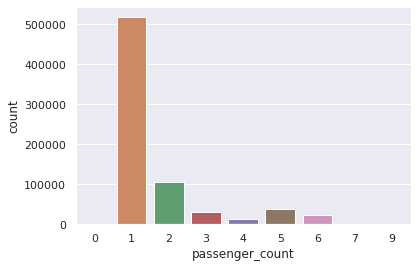

In [77]:
sns.countplot(x='passenger_count',data=data)

We see the highest amount of trips are with 1 passenger.

Let us remove the rows which have 0 or 7 or 9 passenger count.

In [78]:
data=data[data['passenger_count']!=0]

data=data[data['passenger_count']<=6]

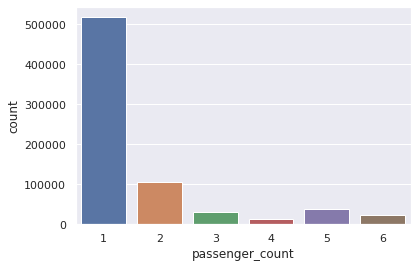

In [79]:
sns.countplot(x='passenger_count',data=data)

Now, that seems like a fair distribution.

In [80]:
#Store and Forward Flag

data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding.

In [81]:
#Distance

data['distance'].value_counts()


0.000000    2893
0.000424      23
0.000424      20
0.000424      19
0.000424      11
            ... 
6.670588       1
1.053985       1
4.718984       1
6.100024       1
1.614936       1
Name: distance, Length: 726218, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.

The driver deliberately took this ride to complete a target ride number.

The passengers canceled the trip.

We will analyze these trips further in bivariate analysis.

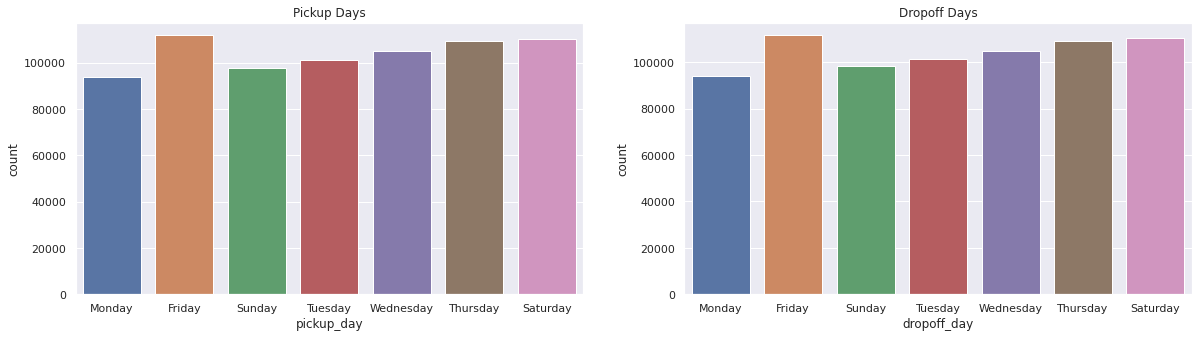

In [82]:
#Trips per Day

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')

ax=sns.countplot(x="pickup_day",data=data,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)


We see Fridays are the busiest days followed by Saturdays. 

That is probably because it’s weekend.

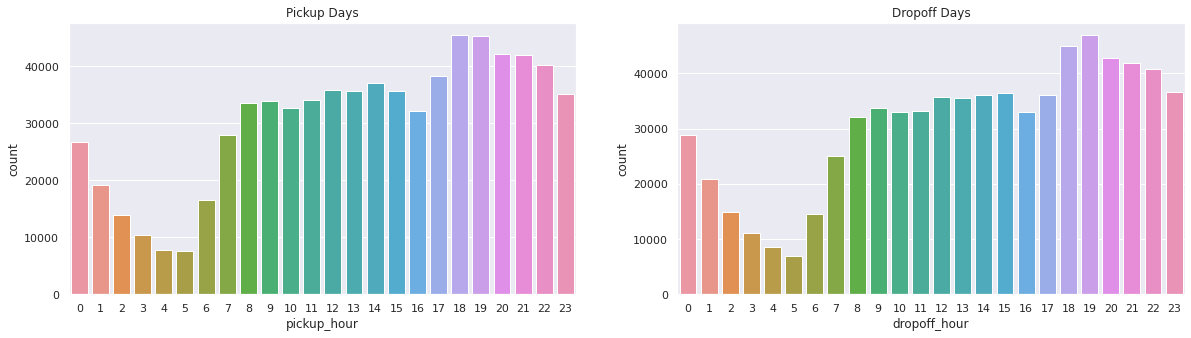

In [83]:
#Trips per Hour

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

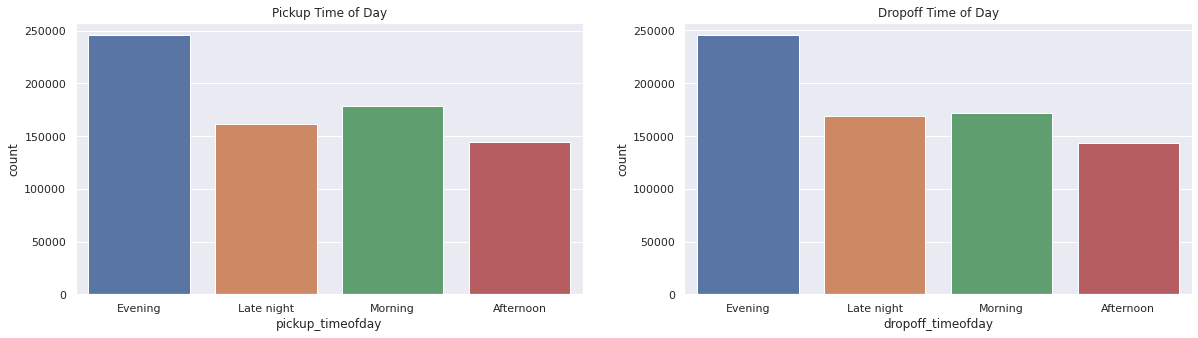

In [84]:
#Trips per Time of Day

figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)


Evenings are the busiest.

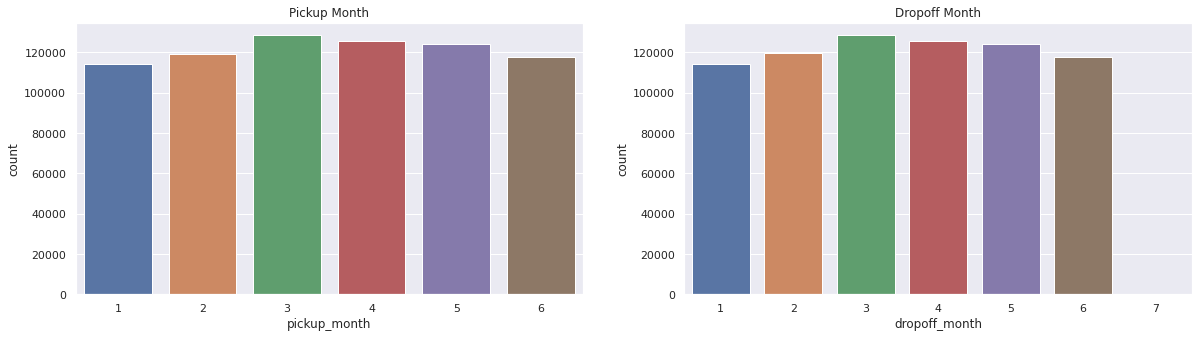

In [85]:
#Trips per month

figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

There is not much difference in the number of trips across months.

Now, we will analyze all these variables further in bivariate analysis.

**Bivariate Analysis**

Bivariate Analysis involves finding relationships, patterns, and correlations between two variables.

 

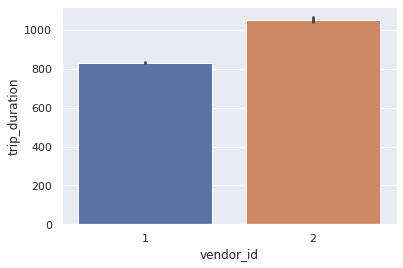

In [86]:
#Trip Duration per Vendor
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

Vendor id 2 takes longer trips as compared to vendor 1.

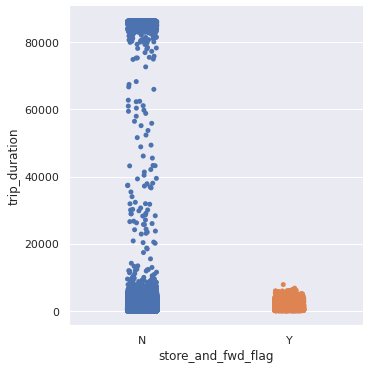

In [87]:
#Trip Duration per Store and Forward Flag

sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

Trip duration is generally longer for trips whose flag was not stored.

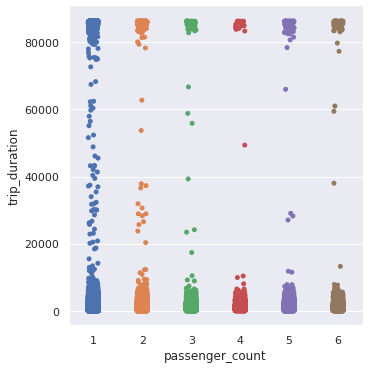

In [88]:
#Trip Duration per passenger count
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind="strip")

There is no visible relation between trip duration and passenger count.

In [89]:
data[data.distance==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,Tuesday,Tuesday,1,1,11,11,6,6,Morning,Morning,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,159,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,897,Monday,Monday,0,0,16,17,6,6,Evening,Evening,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,256,Monday,Monday,0,0,21,21,2,2,Evening,Evening,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,Sunday,Sunday,6,6,11,12,3,3,Morning,Afternoon,0.0


In [90]:
data[data.distance==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,14,Thursday,Thursday,3,3,21,21,5,5,Evening,Evening,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,464,Sunday,Sunday,6,6,20,20,3,3,Evening,Evening,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,421,Sunday,Sunday,6,6,4,4,5,5,Late night,Late night,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,1369,Wednesday,Wednesday,2,2,18,18,4,4,Evening,Evening,0.0
729308,id3477255,2,2016-01-20 08:22:38,2016-01-20 08:47:35,1,-73.977859,40.749538,-73.977859,40.749538,N,1497,Wednesday,Wednesday,2,2,8,8,1,1,Morning,Morning,0.0
